In [ ]:
# importando modulos necesarios
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import pandas as pd

np.random.seed(2016) # replicar random

# parametros esteticos de seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

## 2.1 Variables aleatorias

¿Qué son las variables aleatorias?

**Funciones que toman un evento del espacio muestral y le asignan un número**

Ejemplo de uso de variables aleatorias:

Nos interesa evaluar la perecepción de las personas por una película.
Espacio muestral: "No le gustó", "Neutro", "Le gustó"
Una variable aleatoria consiste en asignar un número a cada posible resultado.
Por ejemplo, X es la variable aleatoria que denota la percepción de las personas por una película y toma tres valores, -1, 0 y 1

Importancia de las variables aleatorias:
    
Al estandarizar el espacio muestral de un experimento, y convertirlo en una variable aleatoria nos permite definir ciertas propiedades sobre la variable aleatoria, en especial, su distribución de probabilidad.

La distribución de probabilidad de las variables aleatorias es usada en la inferencia estadística, la cual nos permite obtener información acerca de una población (por ejemplo).

### Variables discretas y continuas

Las variables aleatorias discretas son aquellas que toman un conjunto de valores contable.

Por ejemplo:
    
* El número de años (enteros) de una persona
* El número de ventas de un artículo en una semana
* El número de sismos en septiembre en la CDMX


Las variables aleatorias continuas son aquellas que toman un número no contable de resultados posibles (dentro de los números reales)

Por ejemplo:
* El peso de una persona
* El precio de una acción
* La altura de la persona
* La dureza de la carne

### Histogramas

Es una herramienta gráfica que nos permite observar la distribución de ocurrencia de los valores de una variable aleatoria. Nos da una idea de la distribución de la probabilidad de una variable aleatoria.

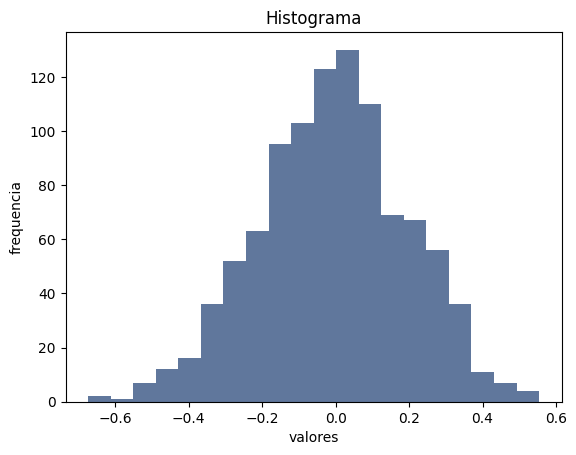

In [ ]:
# Graficando histograma
mu, sigma = 0, 0.2
datos = np.random.normal(mu, sigma, 1000)

# histograma de distribución normal.
cuenta, cajas, ignorar = plt.hist(datos, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma')
plt.show()

### Función masa de probabilidad

Es una función que corresponde a las variables aleatorias discretas, y nos indica cuál es la probabilidad de que ocurra cada valor de la variable aleatoria. Nos da una idea sobre los parámetros de la variable aleatoria.

Los parámetros de una variable aleatoria son valores que definen el comportamiento de la variable aleatoria, una vez conocida su distribución o modelo probabilístico.

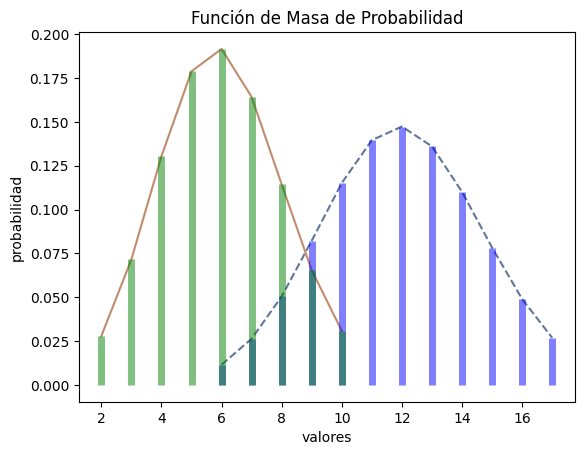

In [ ]:
# Graficando FMP
n, p = 30, 0.4 # parametros de forma de la distribución binomial
n_1, p_1 = 20, 0.3 # parametros de forma de la distribución binomial
x = np.arange(stats.binom.ppf(0.01, n, p),
              stats.binom.ppf(0.99, n, p))
x_1 = np.arange(stats.binom.ppf(0.01, n_1, p_1),
              stats.binom.ppf(0.99, n_1, p_1))
fmp = stats.binom.pmf(x, n, p) # Función de Masa de Probabilidad
fmp_1 = stats.binom.pmf(x_1, n_1, p_1) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.plot(x_1, fmp_1)
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.vlines(x_1, 0, fmp_1, colors='g', lw=5, alpha=0.5)
plt.title('Función de Masa de Probabilidad')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

### Función de densidad de probabilidad

Es el análogo a la función masa de probabilidad pero en variables aleatorias continuas. NO nos representa probabilidades de ocurrencia, pero si nos permite calcular probabilidades de que la variable aleatoria se encuentre dentro de un intervalo gracias al área bajo la curva

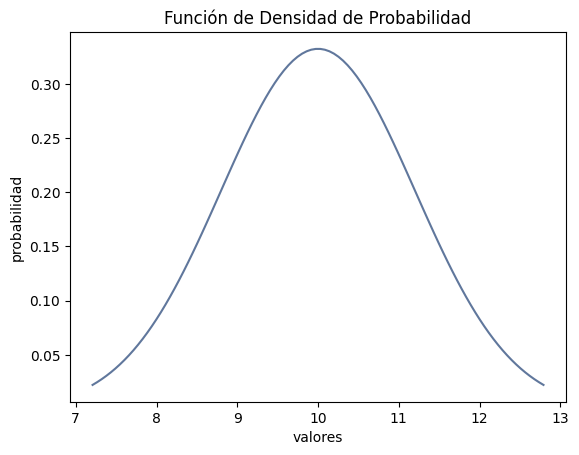

In [ ]:
# Graficando Función de Densidad de Probibilidad con Python
FDP_normal = stats.norm(10, 1.2).pdf(x_1) # FDP
plt.plot(x_1, FDP_normal, label='FDP nomal')
plt.title('Función de Densidad de Probabilidad')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

### Función de distribución acumulada

Permite representar la probabilidad acumulada de una variable aleatoria.

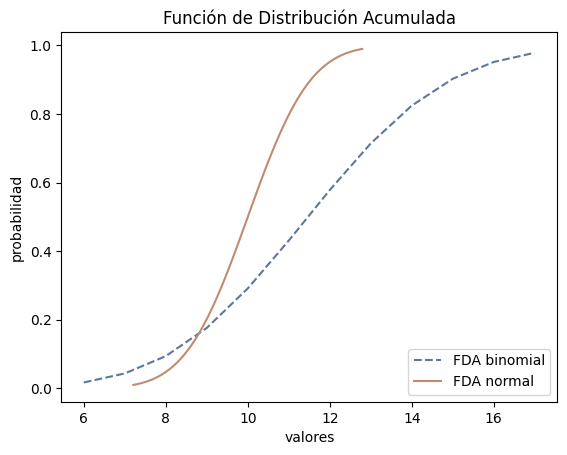

In [ ]:
# Graficando Función de Distribución Acumulada con Python
x_1 = np.linspace(stats.norm(10, 1.2).ppf(0.01),
                  stats.norm(10, 1.2).ppf(0.99), 100)
fda_binom = stats.binom.cdf(x, n, p) # Función de Distribución Acumulada
fda_normal = stats.norm(10, 1.2).cdf(x_1) # Función de Distribución Acumulada
plt.plot(x, fda_binom, '--', label='FDA binomial')
plt.plot(x_1, fda_normal, label='FDA normal')
plt.title('Función de Distribución Acumulada')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.legend(loc=4)
plt.show()

## Esperanza y varianza de una variable aleatoria

La esperanza matemática o valor esperado, es el valor ponderado de la variable aleatoria de acuerdo a su probabilidad de ocurrencia. Comúnmente, para variables aleatorias con **distribución de probabilidad simétrica**, la esperanza puede representar el valor más probable de la variable aleatoria.

Para X, una variable aleatoria discreta, la esperanza se calcula como:
    
$$E(X) = \sum_{x}{xP(X=x)}$$

Para X, una variable aleatoria continua, con función de densidad $f$, la esperanza se calcula como:
    
$$E(X) = \int_{R}{xf(x)dx}$$

La varianza representa la variabilidad que hay de la variable aleatoria respecto a la media. La varianza mide "qué tanto se aleja la variable aleatoria de la media"

Para X, con media $\mu$, la varianza se calcula como:
    
$$Var(X) = E((X-\mu)^2) = E(X^2) - (E(X))^2$$

## 2.2 Variables aleatorias discretas

### Distribución binomial

Se utiliza para representar casos de éxito en un conjunto de $n$ ensayo.

Ejemplos:

* El número de personas que compraron un artículo de las que llegaron a la tienda
* El número de acciones que subieron dentro de un portafolio de inversión
* El número de alumnos reprobados en una escuela

Los parámetros que definen una variable con distribución binomial son $n$ y $p$, donde $n$ es el número de ensayos y $p$ es la probabilidad de éxito.

La esperanza de una variable Binomial es $E(X) = np$ y la varianza es $Var(X) = np(1-p)$

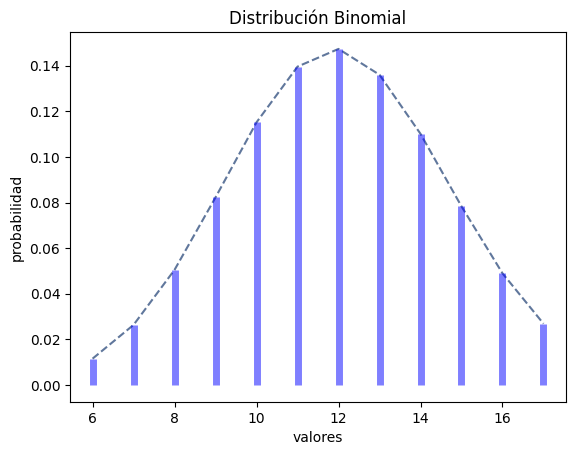

In [ ]:
# Graficando Binomial
N, p = 30, 0.4 # parametros de forma
binomial = stats.binom(N, p) # Distribución
x = np.arange(binomial.ppf(0.01),
              binomial.ppf(0.99))
fmp = binomial.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Binomial')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

### Distribución Poisson

Es un caso especial de la binomial, bajo las siguientes condiciones:
* El número de ensayos es muy alto (tiende a infinito)
* La probabilidad de éxito es muy baja

Ejemplos:
* El número de días con sismos que ocurren en un año (hay 365 ensayos y la probabilidad es muy baja)
* El número de artículos defectuosos dentro de la producción de un algún producto
* El número de pacientes con efectos secundarios sobre un nuevo medicamento

Tiene un sólo parámetro, $\lambda$ y representa la tasa de ocurrencia de éxito. El valor esperado y la variaza es $\lambda$

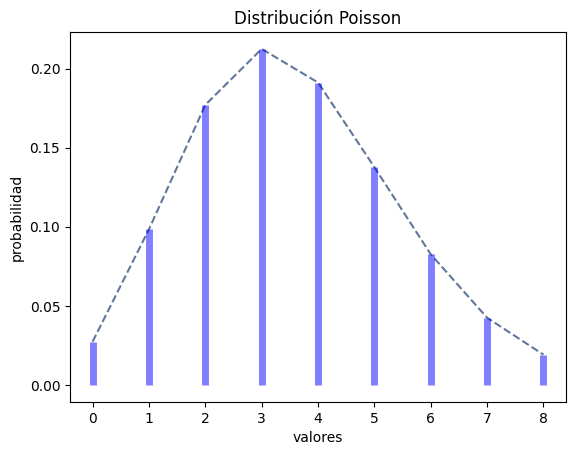

In [ ]:
# Graficando Poisson
mu =  3.6 # parametro de forma
poisson = stats.poisson(mu) # Distribución
x = np.arange(poisson.ppf(0.01),
              poisson.ppf(0.99))
fmp = poisson.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Poisson')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

## Distribución Geométrica

Representa el número de ensayos necesarios para obtener un éxito

Ejemplo:
* El número de papas a abrir para obtener el tazo #5
* El número de partidos de un equipo de fútbol hasta obtener su primera derrota
* El número de entrevistas de trabajo hechas antes de obtener empleo

La distribución geométrica solo tiene un parámetro $p$ que es la probabilidad de éxito.

El valor esperado es $\frac{1}{p}$ y la varianza es $\frac{1-p}{p^2}$

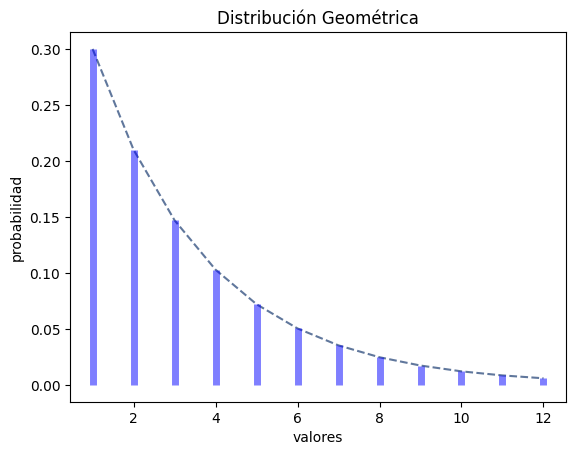

In [ ]:
# Graficando Geométrica
p =  0.3 # parametro de forma
geometrica = stats.geom(p) # Distribución
x = np.arange(geometrica.ppf(0.01),
              geometrica.ppf(0.99))
fmp = geometrica.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Geométrica')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

## 2.3 Distribuciones continuas

### Distribución uniforme

Representa fenomenos donde la ocurrencia de cualquier valor tiene la misma probabilidad

Por ejemplo:

* Lanzar un dardo a un blanco
* El número de un celular (uniforme discreta)
* Se utiliza mucho en la simulación de números aleatorios

Hay pocos ejemplos en la práctica, pero los números aleatorios generados por una computadora siguen una distribución uniforme y con ellos, bajo ciertas transformaciones, nos permiten simular cualquier otra distribución.

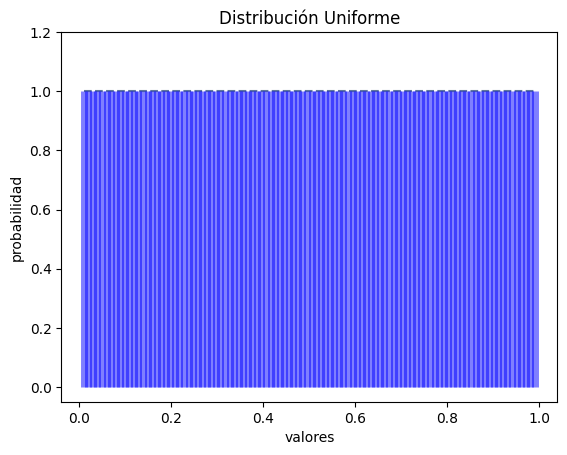

In [ ]:
# Graficando Uniforme
uniforme = stats.uniform()
x = np.linspace(uniforme.ppf(0.01),
                uniforme.ppf(0.99), 100)
fp = uniforme.pdf(x) # Función de Probabilidad
fig, ax = plt.subplots()
ax.plot(x, fp, '--')
ax.vlines(x, 0, fp, colors='b', lw=5, alpha=0.5)
ax.set_yticks([0., 0.2, 0.4, 0.6, 0.8, 1., 1.2])
plt.title('Distribución Uniforme')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

### Distribución exponencial

Describe tiempos de ocurrencia de muchos fenómenos.

Ejemplo:

* Tiempo de vida de un producto (por ejemplo, una televisión)
* Tiempo de atención a un cliente
* Tiempo en que una bacteria se reproduce

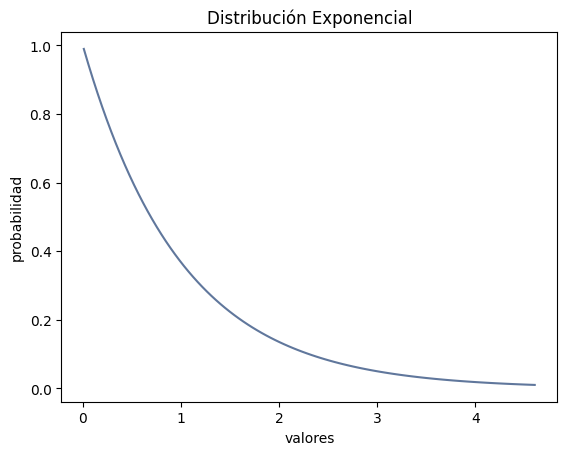

In [ ]:
# Graficando Exponencial
exponencial = stats.expon()
x = np.linspace(exponencial.ppf(0.01),
                exponencial.ppf(0.99), 100)
fp = exponencial.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Exponencial')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

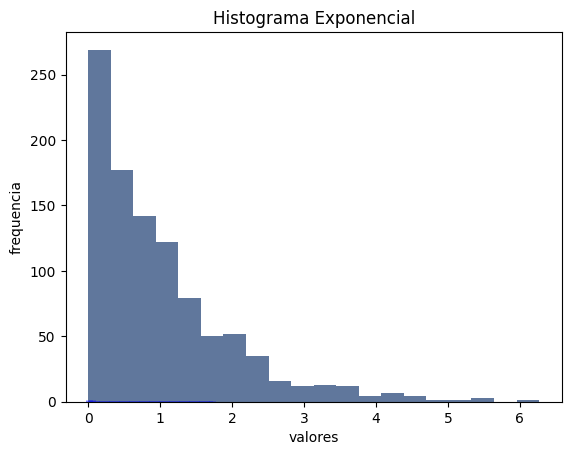

In [ ]:
# histograma
aleatorios = exponencial.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.vlines(x, 0, fp, colors='b', lw=5, alpha=0.5)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Exponencial')
plt.show()

### Distribución normal

Se utiliza para modelar la gran mayoría de fenómenos aleatorios en la vida cotidiana.

Ejemplo:
La esperanza de vida de una persona (depende el país)
La altura de una persona
El coeficiente intelectual
Carecterísticas morfólogicas de las personas (estatura, edad, peso)
Características sociológicas, percepción sobre cierto producto por un grupo de individuos
Características psicológicas, el IQ
Los errores de medición

Tiene dos parámetros: $\mu$ que es la media y $\sigma$ que es la varianza

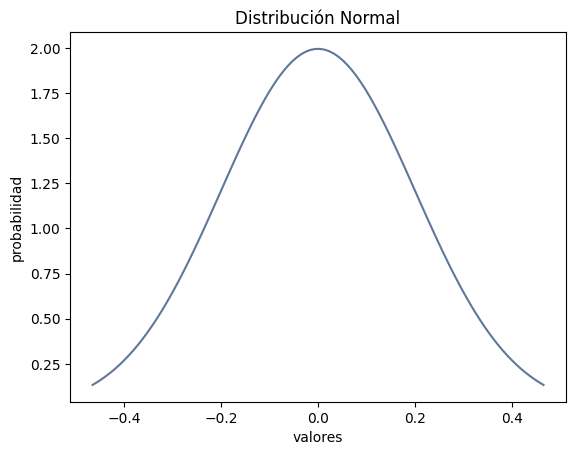

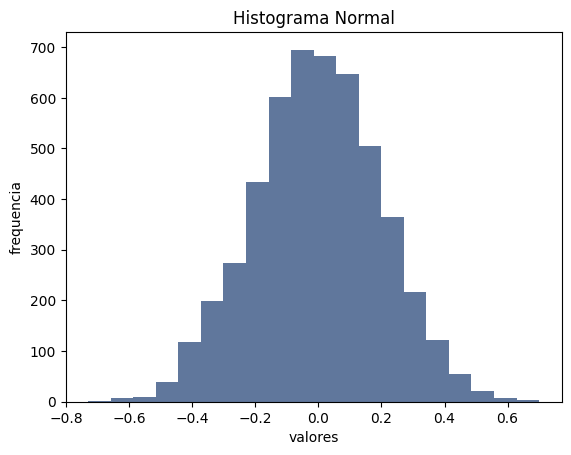

In [ ]:
# Graficando Normal
mu, sigma = 0, 0.2 # media y desvio estandar
normal = stats.norm(mu, sigma)
x = np.linspace(normal.ppf(0.01),
                normal.ppf(0.99), 100)
fp = normal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

# histograma
aleatorios = normal.rvs(5000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Normal')
plt.show()

### Distribución log-normal

Nos permite medir variables aleatorias limitas por ceros, por ejemplo variables que solo toman valores positivos

Ejemplo:
* El peso de los adultos
* Duración de tiempos de enfermedades
* Distribución de riqueza

Podemos ver la distribución log-normal como un truncamiento a la distribución normal

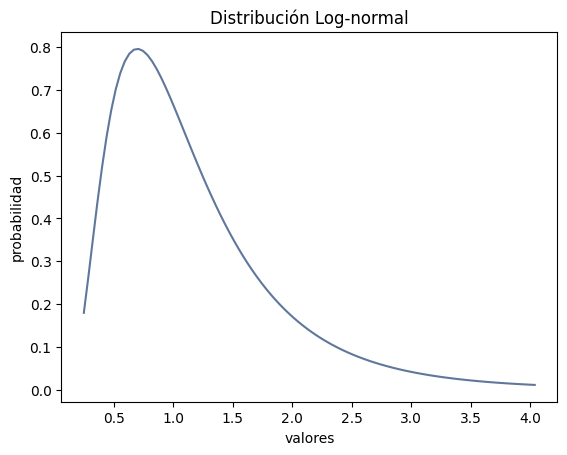

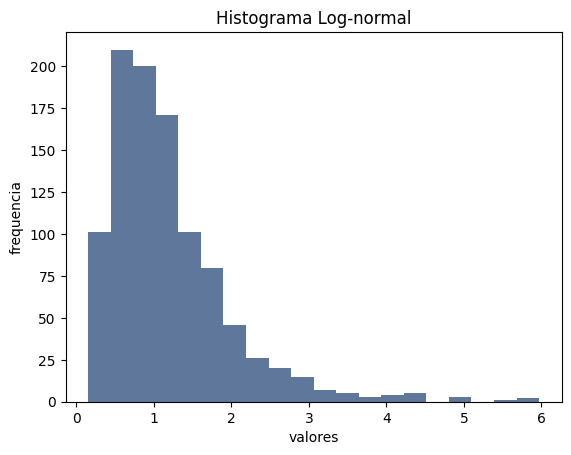

In [ ]:
# Graficando Log-Normal
sigma = 0.6 # parametro
lognormal = stats.lognorm(sigma)
x = np.linspace(lognormal.ppf(0.01),
                lognormal.ppf(0.99), 100)
fp = lognormal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Log-normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

# histograma
aleatorios = lognormal.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Log-normal')
plt.show()

### Distribución Chi-cuadrada

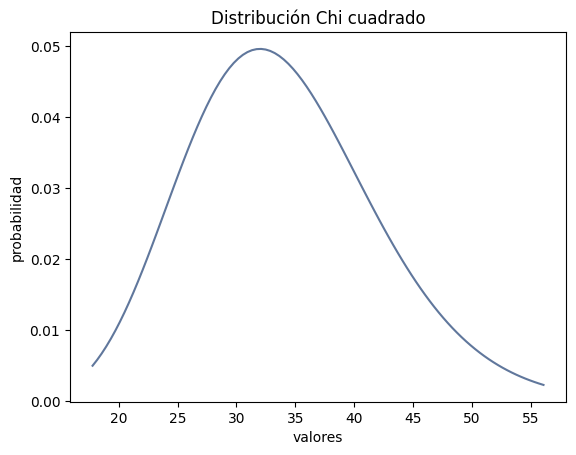

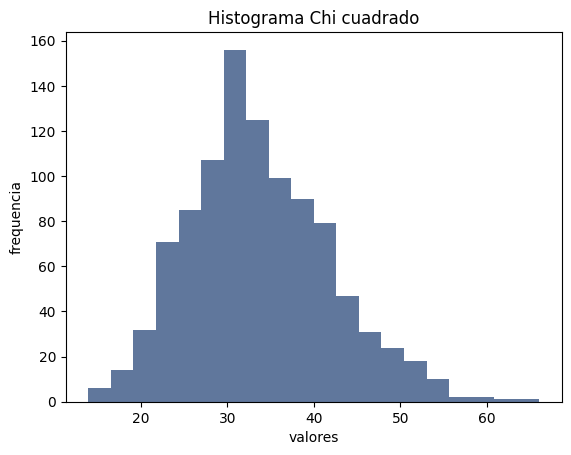

In [ ]:
# Graficando Chi cuadrado
df = 34 # parametro de forma.
chi2 = stats.chi2(df)
x = np.linspace(chi2.ppf(0.01),
                chi2.ppf(0.99), 100)
fp = chi2.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Chi cuadrado')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

aleatorios = chi2.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Chi cuadrado')
plt.show()

### Distribución t de student

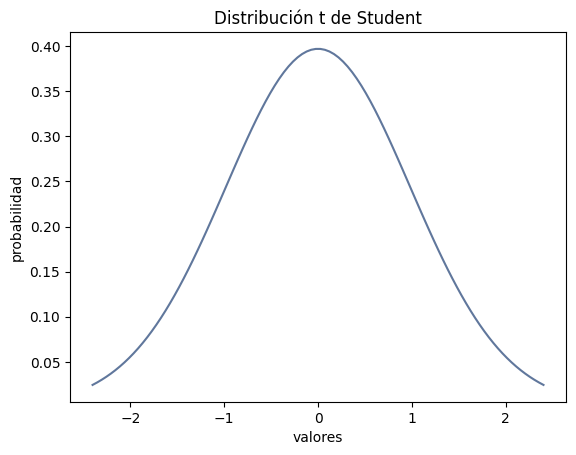

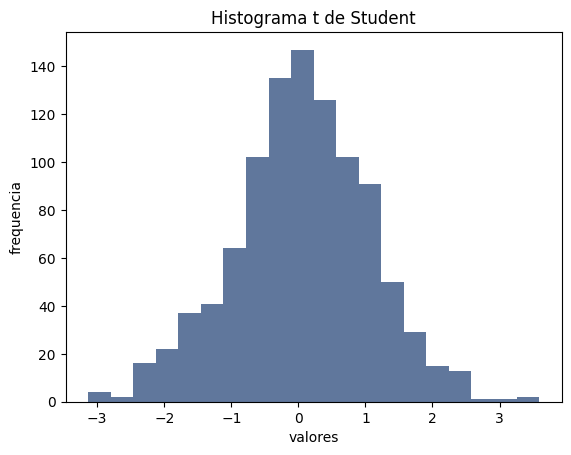

In [ ]:
# Graficando t de Student
df = 50 # parametro de forma.
t = stats.t(df)
x = np.linspace(t.ppf(0.01),
                t.ppf(0.99), 100)
fp = t.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución t de Student')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()


# histograma
aleatorios = t.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma t de Student')
plt.show()

### ¿Cómo elegir el modelo que se ajusta a los datos?

1. ¿Los datos pueden tomar valores discretos o continuos?

2. ¿Los datos son simétricos? si hay asimetría, en ¿qué dirección se encuentra?

3. ¿límites superiores e inferiores en los datos?

4. ¿posibilidad de observar valores extremos en la distribución?

## 2.4 Distribución normal y sus propiedades

* La distribución normal es simétrica alrededor de su media.
* La función de densidad de la distribución normal tiene una forma de campana.
* La distribución normal es completamente definida por su media y su desviación estándar.
* La distribución normal tiene una serie de características matemáticas que la hacen fácilmente manejable, incluyendo la posibilidad de transformarla en una distribución estándar con una media de cero y una desviación estándar de uno.

### 2.5 Ley de los grandes números y Teorema límite central

### Independencia en probabilidad

Dos eventos son independientes si la probabilidad de uno no se ve afectada por la ocurrencia de otro.

La ley de los grandes números menciona que si se repite un experimento aleatorio, bajo las mismas condiciones, un número ilimitado de veces; y si estas repeticiones son independientes la una de la otra, entonces la frecuencia de veces que un evento A ocurra, convergerá con probabilidad 1 a un número que es igual a la probabilidad de que A ocurra en una sola repetición del experimento.

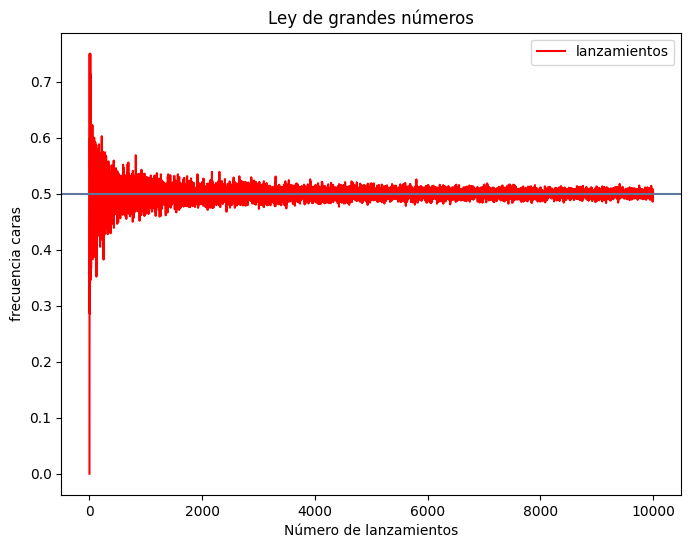

In [ ]:
# Ejemplo ley de grandes números
# moneda p=1/2 cara=1 seca=0
resultados = []
for lanzamientos in range(1,10000):
    lanzamientos = np.random.choice([0,1], lanzamientos)
    caras = lanzamientos.mean()
    resultados.append(caras)

# graficamente
df = pd.DataFrame({ 'lanzamientos' : resultados})

df.plot(title='Ley de grandes números',color='r',figsize=(8, 6))
plt.axhline(0.5)
plt.xlabel("Número de lanzamientos")
plt.ylabel("frecuencia caras")
plt.show()

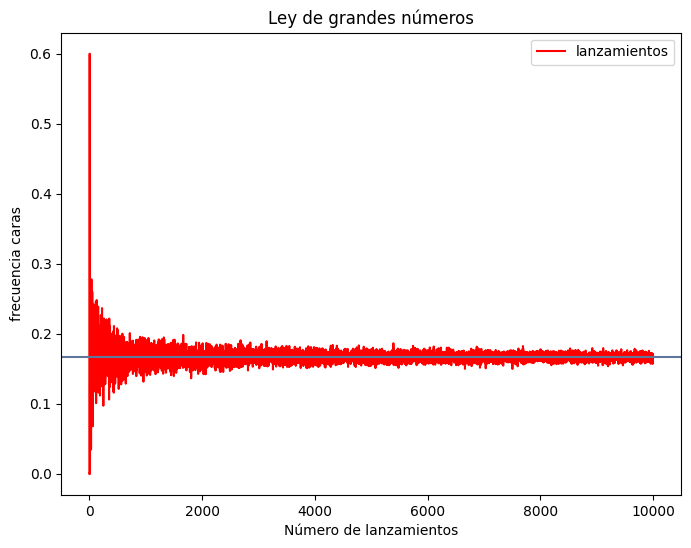

In [ ]:
# moneda p=1/6 cara=1 seca=0
resultados = []
for lanzamientos in range(1,10000):
    lanzamientos = np.random.choice([0,1], lanzamientos, p=[5/6, 1/6])
    caras = lanzamientos.mean()
    resultados.append(caras)

# graficamente
df = pd.DataFrame({ 'lanzamientos' : resultados})

df.plot(title='Ley de grandes números',color='r',figsize=(8, 6))
plt.axhline(1/6)
plt.xlabel("Número de lanzamientos")
plt.ylabel("frecuencia caras")
plt.show()

El teorema límite central establece que la suma o el promedio de casi cualquier conjunto de variables aleatorias **independientes** generadas al azar se aproximan a la Distribución Normal.

In [ ]:
# Ejemplo teorema del límite central
muestra_binomial = []
muestra_exp = []
muestra_possion = []
muestra_geometric = []
mu = .9
lam = 1.0
size=1000

for i in range(1,20000):
    muestra = np.random.binomial(1, mu, size=size)
    muestra_binomial.append(muestra.mean())
    muestra = np.random.exponential(scale=2.0,size=size)
    muestra_exp.append(muestra.mean())
    muestra = np.random.geometric(p=.5, size=size)
    muestra_geometric.append(muestra.mean
                             ())
    muestra = np.random.poisson (lam=lam, size=size)
    muestra_possion.append(muestra.mean())

df = pd.DataFrame({ 'binomial' : muestra_binomial,
                     'poission' : muestra_possion,
                     'geometrica' : muestra_geometric,
                    'exponencial' : muestra_exp})


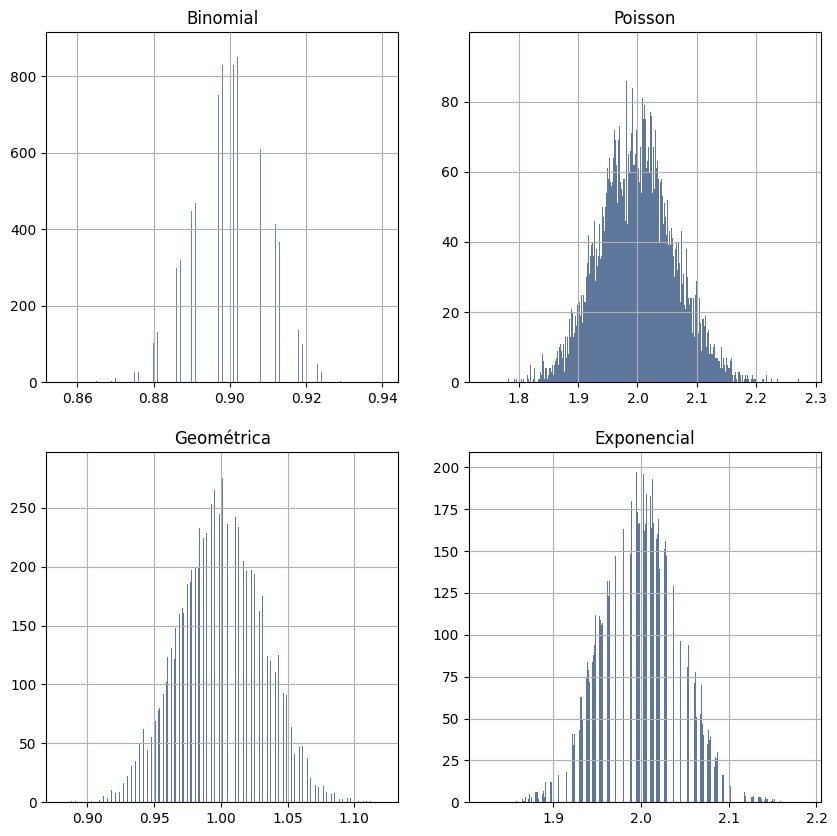

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
df.binomial.hist(ax=axes[0,0], alpha=0.9, bins=1000)
df.exponencial.hist(ax=axes[0,1],bins=1000)
df.poission.hist(ax=axes[1,0],bins=1000)
df.geometrica.hist(ax=axes[1,1],bins=1000)

axes[0,0].set_title('Binomial')
axes[0,1].set_title('Poisson')
axes[1,0].set_title('Geométrica')
axes[1,1].set_title('Exponencial')
plt.show()